In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import statsmodels.stats.proportion as proportion

In [3]:
np.random.seed(42)

n_A = 1000
n_B = 1000

conversions_A = np.random.binomial(n=1, p=0.10, size=n_A)
conversions_B = np.random.binomial(n=1, p=0.13, size=n_B)

data = pd.DataFrame({
    'group': ['A'] * n_A + ['B'] * n_B,
    'converted': np.concatenate([conversions_A, conversions_B])
})

print(data.head())

  group  converted
0     A          0
1     A          1
2     A          0
3     A          0
4     A          0


Conversion Rates:
group
A    0.100
B    0.131
Name: converted, dtype: float64


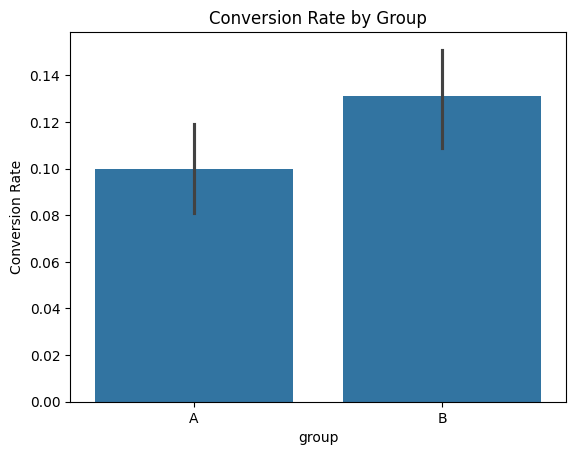

In [4]:
conv_rate = data.groupby('group')['converted'].mean()
print("Conversion Rates:")
print(conv_rate)

sns.barplot(x='group', y='converted', data=data, errorbar='ci')
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.show()

In [6]:
convert_A = data[data['group']=='A']['converted'].sum()
convert_B = data[data['group']=='B']['converted'].sum()

z_stat, p_val = proportion.proportions_ztest(
    count=[convert_B, convert_A],
    nobs=[n_B, n_A],
    alternative='larger'
)

print(f"\nZ = {z_stat:.3f}, p-value = {p_val:.4f}")
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")

rate_A = convert_A / n_A
rate_B = convert_B / n_B
lift = rate_B - rate_A
rel_lift = lift / rate_A
print(f"Lift: +{lift:.3f} ({rel_lift:.1%})")

ci_low, ci_high = proportion.confint_proportions_2indep(
    count1=convert_B, nobs1=n_B, count2=convert_A, nobs2=n_A, compare='diff'
)
print(f"95% CI: [{ci_low:.3f}, {ci_high:.3f}]")


Z = 2.169, p-value = 0.0151
Reject H0
Lift: +0.031 (31.0%)
95% CI: [0.003, 0.059]
